In [68]:
import os
import re
import numpy as np
from collections import defaultdict
from rttm import load_rttm, Turn

from pyannote.core import Annotation, Segment
from pyannote.database.util import load_rttm as load_pyannote_rttm

In [105]:
# rttm_path = '/home/jovyan/work/voxsrc21-dia/data/voxconverse/sample/rttm'
rttm_path = '/home/jovyan/work/datasets/voxconverse/test/rttm'
save_dir_path = '/home/jovyan/work/voxsrc21-dia/embeddings/sequences'
os.makedirs(save_dir_path, exist_ok=True)

dev_intervals_path = save_dir_path + '/voxcon-dev-intervals.npy'
test_intervals_path = save_dir_path + '/voxcon-test-intervals.npy'

dev_intervals = np.load(dev_intervals_path,allow_pickle=True)
test_intervals = np.load(test_intervals_path,allow_pickle=True)

# should be processed with the audios
# these are from the logs, to replicate the files order
dev_audio_ids = ["abjxc","ahnss","akthc","asxwr","atgpi","aufkn","azisu","bkwns","bspxd","bxpwa","cyyxp","czlvt","dhorc","djqif","dscgs","edixl","ehpau","eqttu","esrit","exymw","eziem","ezsgk","femmv","fkvvo","fsaal","fvyvb","fxgvy","ggvel","gocbm","gqbvk","gqdxy","grzbb","hiyis","hqyok","hycgx","ikgcq","imtug","ipqqq","iqbww","iqtde","irvat","jnivh","jynhe","kctgl","kkghn","ktzmw","kuduk","ldkmv","lfzib","lknjp","luvfz","mdbod","mekog","mesob","mgpok","migzj","mkrcv","mpvoh","mqxsf","mwfmq","nctdh","nfqjx","ntchr","nxgad","oekmc","ooxnm","pgkde","plbbw","pnyir","ppgjx","qfdpp","qouur","qppll","qrzjk","qydmg","qygfk","qzwxa","rcxzg","rxgun","sikkm","sosnj","suuxu","syiwe","szsyz","tguxv","tjkfn","tlprc","tplwz","udjij","uexjc","ulriv","uvnmy","vmbga","whmpa","wjhgf","xiglo","xxwgv","ycxxe","ydlfw","ypwjd","yrsve","yuzyu","ywcwr","zcdsd","zfkap","zmndm","zrlyl","zyffh","nnqfq","aisvi","usbgm","xvllq","oenox","praxo","onpra","kefgo","bauzd","mjgil","blwmj","gofnj","uatlu","rtvuw","wnfoi","evtyi","tcwsn","pilgb","cmfyw","dbugl","mevkw","jsdmu","jiqvr","hkzpa","hgeec","jcako","epdpg","cqaec","kkwkn","spzmn","ngyrk","sldwj","cmhsm","ndkwv","kbkon","bdopb","qhesr","cwryz","djngn","dvngl","qsfzo","gwtwd","cobal","sduml","vysqj","jtagk","hgdez","wdjyj","qpylu","tfvyr","falxo","bydui","willh","wspbh","ufpel","kiadt","nrogz","imbqf","crixb","ylnza","wewoz","qvtia","kszpd","bwzyf","xypdm","mvjuk","jhdav","pqmho","jsmbi","ccokr","ampme","odkzj","tiams","tucrg","bravd","houcx","gpjne","goyli","txcok","jyirt","oxxwk","iwdjy","kckqn","ioasm","paibn","kklpv","vbjlx","jyflp","sqkup","xmfzh","afjiv","eapdk","pnook","yfcmz","gzvkx","oklol","qjgpl","wbqza","wmori","ysgbf","zajzs","zidwg","ztzzr","zvmyn"]
test_audio_ids = ["aepyx","aiqwk","bjruf","bmsyn","bxcfq","byapz","clfcg","cqfmj","crylr","cvofp","dgvwu","dohag","dxbbt","dzsef","eauve","eazeq","eguui","epygx","eqsta","euqef","fijfi","fpfvy","fqrnu","fxnwf","fyqoe","gcfwp","gtjow","gtnjb","gukoa","guvqf","gylzn","gyomp","hcyak","heolf","hhepf","ibrnm","ifwki","iiprr","ikhje","jdrwl","jjkrt","jjvkx","jrfaz","jsbdo","jttar","jxpom","jzkzt","kajfh","kmunk","kpjud","ktvto","kvkje","lbfnx","ledhe","lilfy","ljpes","lkikz","lpola","lscfc","ltgmz","lubpm","luobn","mjmgr","msbyq","mupzb","myjoe","nlvdr","nprxc","ocfop","ofbxh","olzkb","ooxlj","oqwpd","otmpf","ouvtt","poucc","ppexo","pwnsw","qadia","qeejz","qlrry","qwepo","rarij","rmvsh","rxulz","sebyw","sexgc","sfdvy","svxzm","tkybe","tpslg","uedkc","uqxlg","usqam","vncid","vylyk","vzuru","wdvva","wemos","wprog","wwzsk","xggbk","xkgos","xlyov","xmyyy","xqxkt","xtdcl","xtzoq","xvxwv","ybhwz","ylzez","ytmef","yukhy","yzvon","zedtj","zfzlc","zowse","zqidv","zztbo","ralnu","uicid","laoyl","jxydp","pzxit","upshw","gfneh","kzmyi","nkqzr","kgjaa","dkabn","eucfa","erslt","mclsr","fzwtp","dzxut","pkwrt","gmmwm","leneg","sxqvt","pgtkk","fuzfh","vtzqw","rsypp","qxana","optsn","dxokr","ptses","isxwc","gzhwb","mhwyr","duvox","ezxso","jgiyq","rpkso","kmjvh","wcxfk","gcvrb","eddje","pccww","vuewy","tvtoe","oubab","jwggf","aggyz","bidnq","neiye","mkhie","iowob","jbowg","gwloo","uevxo","nitgx","eoyaz","qoarn","mxdpo","auzru","diysk","cwbvu","jeymh","iacod","cawnd","vgaez","bgvvt","tiido","aorju","qajyo","ryken","iabca","tkhgs","tbjqx","mqtep","fowhl","fvhrk","nqcpi","mbzht","uhfrw","utial","cpebh","tnjoh","jsymf","vgevv","mxduo","gkiki","bvyvm","hqhrb","isrps","nqyqm","dlast","pxqme","bpzsc","vdlvr","lhuly","crorm","bvqnu","tpnyf","thnuq","swbnm","cadba","sbrmv","wibky","wlfsf","wwvcs","xffsa","xkmqx","xlsme","ygrip","ylgug","ytula","zehzu","zsgto","zzsba","zzyyo"]

rttm_files = defaultdict(list)
for audio_id in test_files:
    rttm_files[audio_id] = os.path.join(rttm_path, audio_id + '.rttm')

print(f'Number of files: {len(rttm_files)}')

Number of files: 232


In [70]:
def getOnsets(turn):
    return turn.onset

def getDurOnSegment(turn):
    return turn.dur_on_segment

In [106]:
pyannote_annotations = defaultdict(list)
removed_segments = defaultdict(list)
cluster_ids = []

for i, segment_intervals in enumerate(test_intervals):
    annotation = Annotation()
    audio_id = test_audio_ids[i] # we made sure the indexes are related
    
    turns, _, _ = load_rttm(rttm_files.get(audio_id))
    # We prioritize the turns that started last (sort reverse)
    # In order to always get newer speakers
    turns.sort(key=getOnsets, reverse=True)

    # sanitize speaker id to include only numbers
    for turn in turns:
        turn.speaker_id = re.sub('[^0-9]', "", turn.speaker_id)

    segment_speakers = []
    for idx, interval in enumerate(segment_intervals):
        interval_onset = interval[0]
        interval_offset = interval[1]
        interval_duration = interval_offset - interval_onset
        turns_with_interval = [turn for turn in turns if turn.onset <= interval_onset and turn.offset > interval_onset]

        if len(turns_with_interval) == 1:
            segment_speakers.append(turns_with_interval[0].speaker_id)
            annotation[Segment(interval_onset, interval_offset)] = turns_with_interval[0].speaker_id
            continue;

        if len(turns_with_interval) == 0:
            removed_segments[audio_id].append(idx)
            continue;

        # set turn duration inside the segment, so we can use the longest
        for turn in turns_with_interval:
            onset_diff = 0
            offset_diff = 0
            if turn.onset > interval_onset:
                onset_diff = turn.onset - interval_onset
            if turn.offset < interval_offset:
                offset_diff = interval_offset - turn.offset

            turn.dur_on_segment = interval_duration - (onset_diff + offset_diff)

        # sort by turn with the longest duration on segment
        turns_with_interval.sort(key=getDurOnSegment, reverse=True)
        # assign the speaker of the latest turn with the longest
        segment_speakers.append(turns_with_interval[0].speaker_id)
        annotation[Segment(interval_onset, interval_offset)] = turns_with_interval[0].speaker_id

    pyannote_annotations[audio_id] = annotation
    cluster_ids.append(segment_speakers)

cluster_ids_path = os.path.join(save_dir_path, 'voxcon-test-cluster-ids.npy')
cluster_ids = np.asarray(cluster_ids)
np.save(cluster_ids_path, cluster_ids)

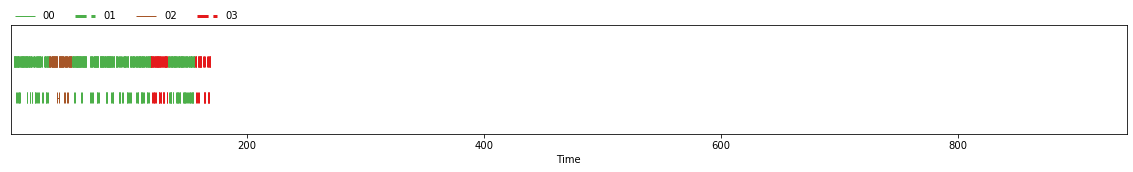

In [110]:
pyannote_annotations[audio_id]

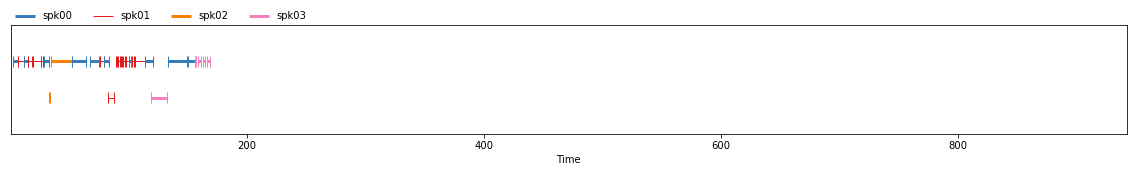

In [109]:
audio_id=test_files[0]
pyannote_rttm = load_pyannote_rttm(rttm_files.get(audio_id))[audio_id]

pyannote_rttm

In [ ]:
# turns.sort(key=getOnsets)
# for turn in turns:
#     print(turn)

In [ ]:
# for audio_id, rttm_path in rttm_files.items():
#     _, speakers, _ = load_rttm(rttm_files.get(audio_id))
#     print(audio_id, len(speakers))

In [ ]:
# turns, _, _ = load_rttm(rttm_files.get(audio_id))
# for turn in turns:
#     print(turn)